In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping Dataset

In [ ]:
!unzip drive/MyDrive/test.zip

Archive:  drive/MyDrive/test.zip
   creating: test/
   creating: test/images/
  inflating: test/images/003898bd-colonn1936_jpeg_jpg.rf.745b01c89c61865b48854a558668024f.jpg  
  inflating: test/images/0086321a-colonca4954_jpeg_jpg.rf.d43491682eac3bd5f65595d3c3321ac3.jpg  
  inflating: test/images/017d7bfc-colonn2231_jpeg_jpg.rf.f43bef819d139f7df61b0ae3f1381699.jpg  
  inflating: test/images/039ba18a-colonn1804_jpeg_jpg.rf.1c58f66534ab57fb0a411eee7fd63b55.jpg  
  inflating: test/images/048108a6-colonca29_jpeg_jpg.rf.ccfc0e518255da7076b41049601f218a.jpg  
  inflating: test/images/05064d82-colonn2312_jpeg_jpg.rf.1430bed3a85ae2c007de31b9086d7b34.jpg  
  inflating: test/images/05b27225-colonn2339_jpeg_jpg.rf.6fb604cbb2f30988596342f4d12fcec1.jpg  
  inflating: test/images/05b3ae65-colonn117_jpeg_jpg.rf.df62186fa29f437adbf024b91b9f81dc.jpg  
  inflating: test/images/05ca6d93-colonn2532_jpeg_jpg.rf.77f1003fdfa76462caf44b4e7c32bd08.jpg  
  inflating: test/images/065c5dda-colonn2599_jpeg_jpg.rf.ef

Converting Label files from TXT to CSV

In [ ]:
import os
import pandas as pd
from glob import glob

# Define the directory containing the text files
text_dir = '/content/test/labels'

# Define the directory where you want to save the CSV files
output_dir = '/content/test/csv_files'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get a list of text file paths
text_files = glob(os.path.join(text_dir, '*.txt'))

# Loop through each text file
for text_file in text_files:
    # Read the text file into a DataFrame
    df = pd.read_csv(text_file, delimiter=',')  # Adjust delimiter as needed

    # Create a CSV file name based on the text file name
    csv_file = os.path.join(output_dir, os.path.basename(text_file).replace('.txt', '.csv'))

    # Save the DataFrame to a CSV file in the output directory
    df.to_csv(csv_file, index=False)

    print(f'Converted {text_file} to {csv_file}')


Converted /content/test/labels/d66cb6fe-colonn1982_jpeg_jpg.rf.a5387787bebbe102bd7ce0f3f826dde2.txt to /content/test/csv_files/d66cb6fe-colonn1982_jpeg_jpg.rf.a5387787bebbe102bd7ce0f3f826dde2.csv
Converted /content/test/labels/bdc62544-colonca110_jpeg_jpg.rf.2eca2824f2bd09cd1b87405cc4579910.txt to /content/test/csv_files/bdc62544-colonca110_jpeg_jpg.rf.2eca2824f2bd09cd1b87405cc4579910.csv
Converted /content/test/labels/ec3b31c5-colonn2528_jpeg_jpg.rf.5f6579ea88b29c5a9c4c2236e702425c.txt to /content/test/csv_files/ec3b31c5-colonn2528_jpeg_jpg.rf.5f6579ea88b29c5a9c4c2236e702425c.csv
Converted /content/test/labels/a62170de-colonn1905_jpeg_jpg.rf.b64919298edf7c3ac826713bb0a9d4e8.txt to /content/test/csv_files/a62170de-colonn1905_jpeg_jpg.rf.b64919298edf7c3ac826713bb0a9d4e8.csv
Converted /content/test/labels/516bf21f-colonca114_jpeg_jpg.rf.e6b46c515c896569498f919a4402bed6.txt to /content/test/csv_files/516bf21f-colonca114_jpeg_jpg.rf.e6b46c515c896569498f919a4402bed6.csv
Converted /content/t

Load and Preview the Dataset

In [ ]:
import os
import pandas as pd
from glob import glob

# Define the directory containing the CSV files
csv_dir = '/content/test/csv_files'

# Get a list of CSV file paths
csv_files = glob(os.path.join(csv_dir, '*.csv'))

# Read all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate the DataFrames into a single DataFrame
labels = pd.concat(dataframes, ignore_index=True)

# Preview the data
print(f'Number of images: {len(image_paths)}')
print(labels.head())


Number of images: 329
  3 0.31953125 0.6140625 0.4328125 0.384375  \
0   2 0.3265625 0.64140625 0.6375 0.6609375   
1  3 0.77578125 0.259375 0.2140625 0.209375   
2   2 0.7484375 0.2484375 0.440625 0.440625   
3                                       NaN   
4                                       NaN   

            1 0.175 0.5921875 0.175 0.215625  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3  0 0.20390625 0.5140625 0.4078125 0.890625   
4  1 0.67578125 0.7796875 0.165625 0.1671875   

  1 0.19453125 0.6828125 0.1453125 0.23125 1 0.38125 0.5609375 0.175 0.128125  \
0                                      NaN                                NaN   
1                                      NaN                                NaN   
2                                      NaN                                NaN   
3                                      NaN                                NaN   
4

Display Sample Images

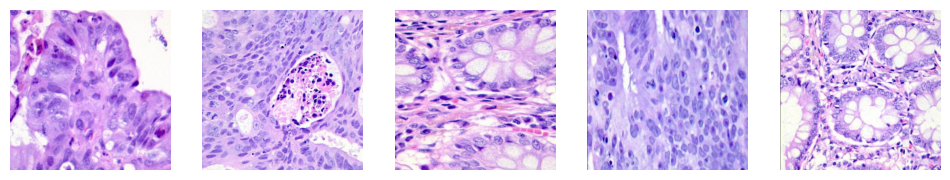

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Display sample images
plt.figure(figsize=(12, 6))
for i, image_path in enumerate(image_paths[:5]):  # Display first 5 images
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
plt.show()

Basic Statistics

Number of images: 329
Series([], Name: count, dtype: int64)


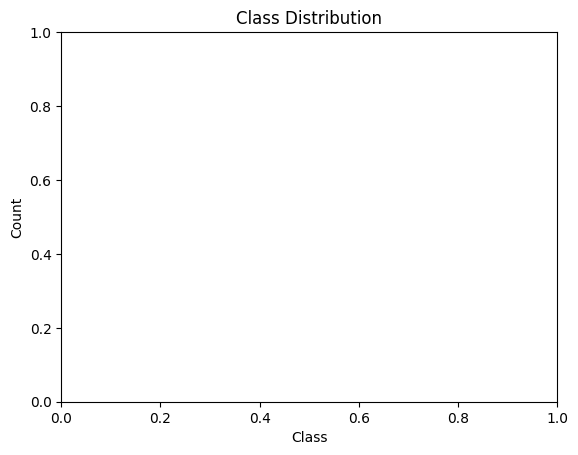

In [ ]:
# Number of images
num_images = len(image_paths)
print(f'Number of images: {num_images}')

# Distribution of classes (if labels are available)
label_counts = labels.value_counts()
print(label_counts)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Image Dimensions

In [ ]:
import numpy as np

# Analyze image dimensions
image_shapes = [cv2.imread(image_path).shape for image_path in image_paths]
unique_shapes = np.unique(image_shapes, axis=0)
print(f'Unique image dimensions: {unique_shapes}')


Unique image dimensions: [[640 640   3]]


Aspect Ratios

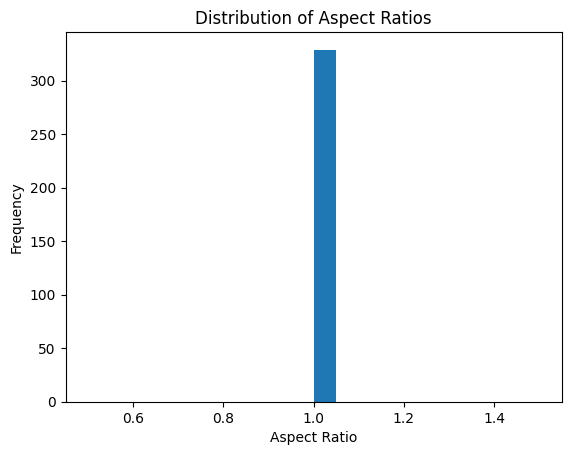

In [ ]:
# Calculate aspect ratios
aspect_ratios = [shape[1] / shape[0] for shape in image_shapes]
plt.hist(aspect_ratios, bins=20)
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Aspect Ratios')
plt.show()


Corrupt Images

In [ ]:
# Check for corrupt images
corrupt_images = []
for image_path in image_paths:
    try:
        img = cv2.imread(image_path)
        if img is None:
            corrupt_images.append(image_path)
    except Exception as e:
        corrupt_images.append(image_path)

print(f'Number of corrupt images: {len(corrupt_images)}')

# Remove corrupt images from the list (optional)
image_paths = [path for path in image_paths if path not in corrupt_images]


Number of corrupt images: 0


Analyze Brightness and Contrast

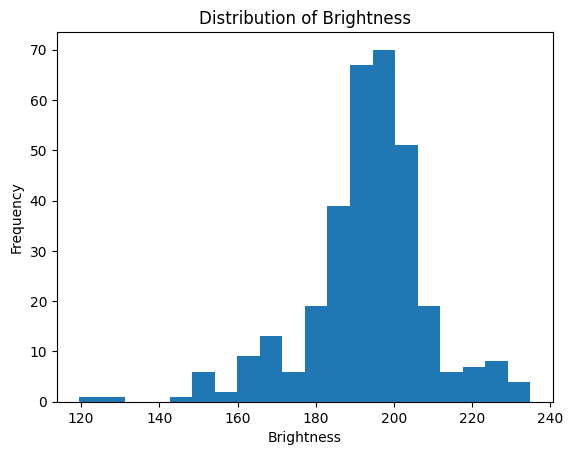

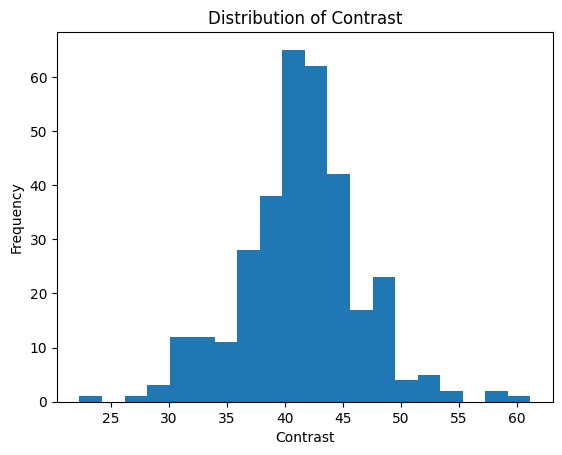

In [ ]:
def calculate_brightness(image):
    return np.mean(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

def calculate_contrast(image):
    return np.std(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

brightness = [calculate_brightness(cv2.imread(image_path)) for image_path in image_paths]
contrast = [calculate_contrast(cv2.imread(image_path)) for image_path in image_paths]

# Plot brightness distribution
plt.hist(brightness, bins=20)
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Distribution of Brightness')
plt.show()

# Plot contrast distribution
plt.hist(contrast, bins=20)
plt.xlabel('Contrast')
plt.ylabel('Frequency')
plt.title('Distribution of Contrast')
plt.show()


Data Augmentation

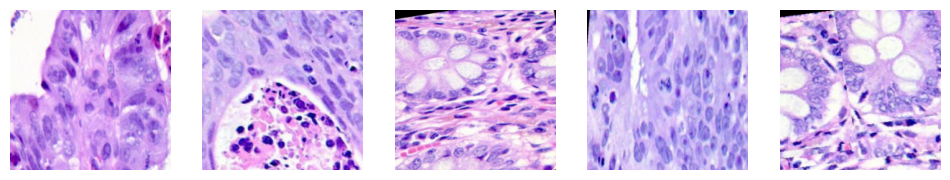

In [ ]:
from torchvision import transforms
from PIL import Image

# Define transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224),
])

# Apply and visualize transformations
plt.figure(figsize=(12, 6))
for i, image_path in enumerate(image_paths[:5]):
    img = Image.open(image_path)
    transformed_img = transform(img)
    plt.subplot(1, 5, i+1)
    plt.imshow(transformed_img)
    plt.axis('off')
plt.show()


Color Distribution

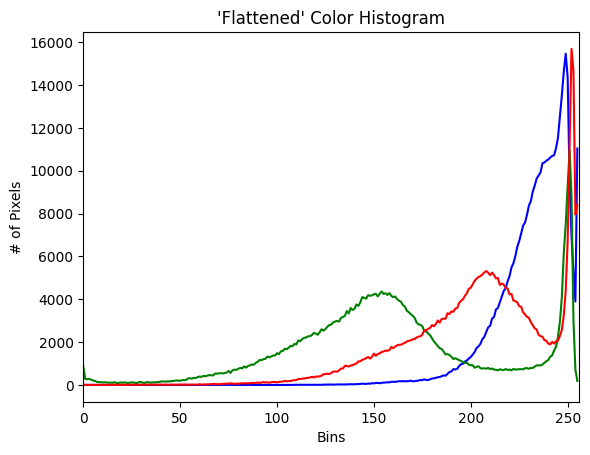

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_color_distribution(image_path):
    image = cv2.imread(image_path)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

    plt.show()

# Example usage
plot_color_distribution(image_paths[0])


Image Similarity Comparison

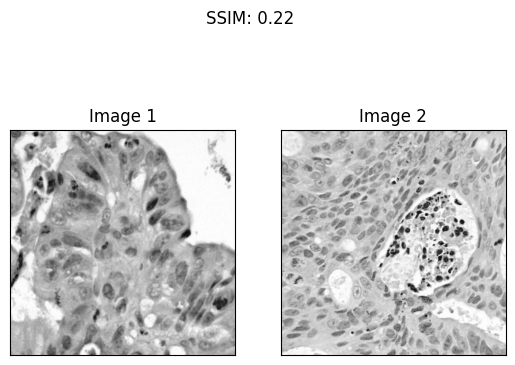

In [ ]:
from skimage.metrics import structural_similarity as ssim

def compare_images(image_path1, image_path2):
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    s = ssim(image1, image2)

    plt.subplot(121), plt.imshow(image1, cmap='gray')
    plt.title('Image 1'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image2, cmap='gray')
    plt.title('Image 2'), plt.xticks([]), plt.yticks([])

    plt.suptitle(f'SSIM: {s:.2f}')
    plt.show()

# Example usage
compare_images(image_paths[0], image_paths[1])


Label Description

In [ ]:
print(labels.describe())

       3 0.31953125 0.6140625 0.4328125 0.384375  \
count                                          3   
unique                                         3   
top      2 0.3265625 0.64140625 0.6375 0.6609375   
freq                                           1   

                 1 0.175 0.5921875 0.175 0.215625  \
count                                           4   
unique                                          4   
top     0 0.20390625 0.5140625 0.4078125 0.890625   
freq                                            1   

       1 0.19453125 0.6828125 0.1453125 0.23125  \
count                                         3   
unique                                        3   
top      1 0.91171875 0.82265625 0.1625 0.34375   
freq                                          1   

              1 0.38125 0.5609375 0.175 0.128125  \
count                                          6   
unique                                         6   
top     1 0.76015625 0.178125 0.1546875 0.115625   
freq     

Edge Detection

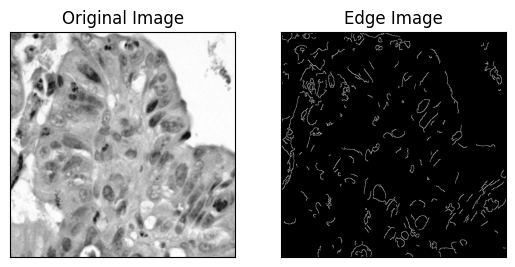

In [ ]:
def detect_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

# Example usage
detect_edges(image_paths[0])
